Customer Acquisition Prediction and Feature Optimization for Banking

This project involves analyzing and modeling customer data from a bank to achieve two main objectives:
1. Customer Segmentation: Segmenting customers into distinct groups based on their features.
2. Predictive Modeling: Building a model to predict the likelihood of a customer responding positively to a marketing campaign.

 Data Preparation

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Users\Gizem Görünmez\Desktop\bank.csv', sep=';')

# Print column names to verify
print(df.columns.tolist())

# Check for duplicates
df.drop_duplicates(inplace=True)

# Handle missing values if any
df.dropna(inplace=True)

# Convert columns to appropriate data types
df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(float)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)  # Handle -1 separately if needed
df['previous'] = df['previous'].astype(int)

# Convert categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
df[categorical_columns] = df[categorical_columns].astype('category')

# Save cleaned data for further use
df.to_csv('cleaned_bank_marketing_data.csv', index=False)



['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [10]:
print(df.head())
print(df.info())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no   1787.0      no   no   
1   33     services  married  secondary      no   4789.0     yes  yes   
2   35   management   single   tertiary      no   1350.0     yes   no   
3   30   management  married   tertiary      no   1476.0     yes  yes   
4   59  blue-collar  married  secondary      no      0.0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

Feature Engineering

In [18]:
# Feature Engineering
df['transaction_frequency'] = df['previous'] / (df['duration'] + 1)
df['avg_transaction_amount'] = df['campaign'] / (df['previous'] + 1)
df['customer_lifetime_value'] = df['campaign'] * df['duration']

# Handle categorical variables with one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Save enhanced data
df_encoded.to_csv('enhanced_bank_marketing_data.csv', index=False)


Exploratory Data Analysis (EDA)

Visualize Distributions and Relationships:

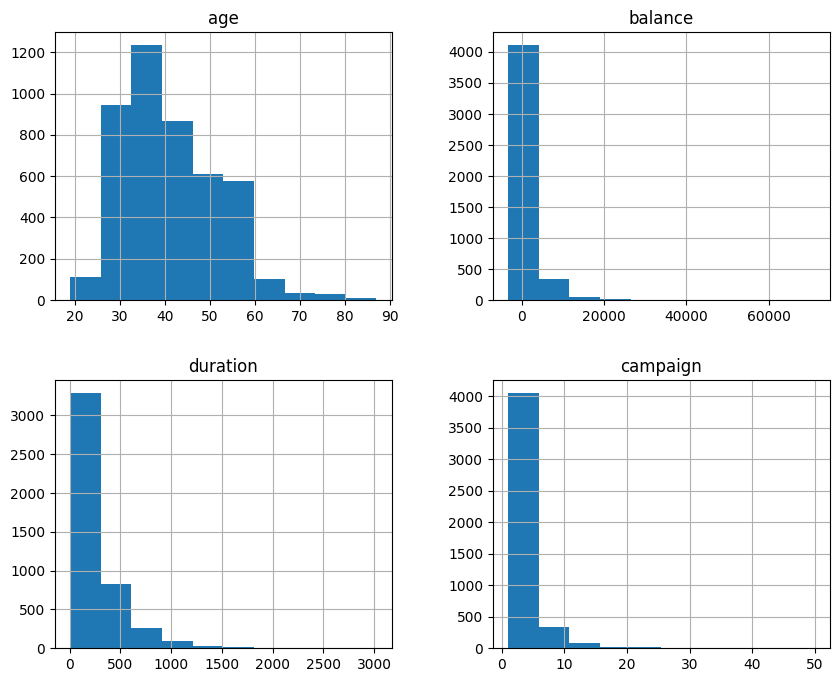

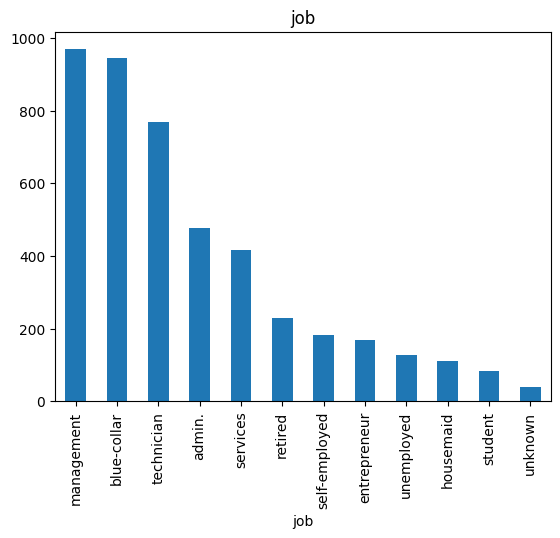

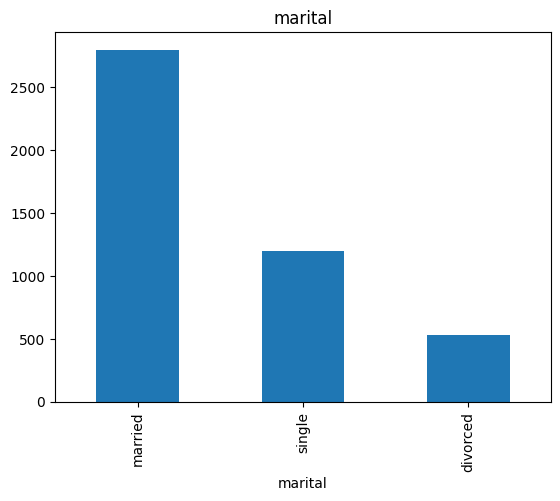

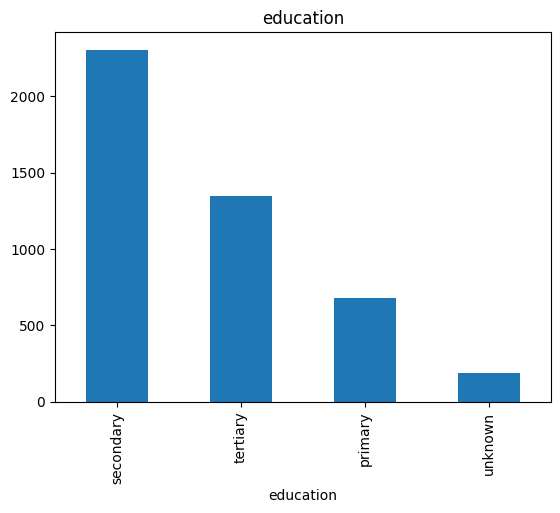

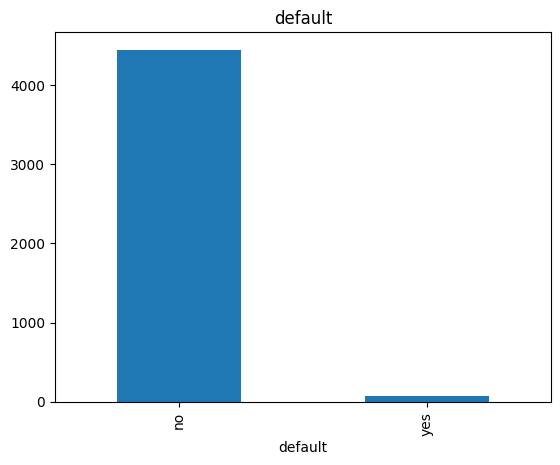

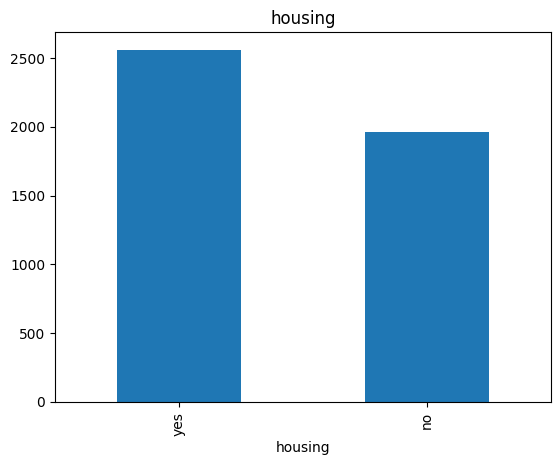

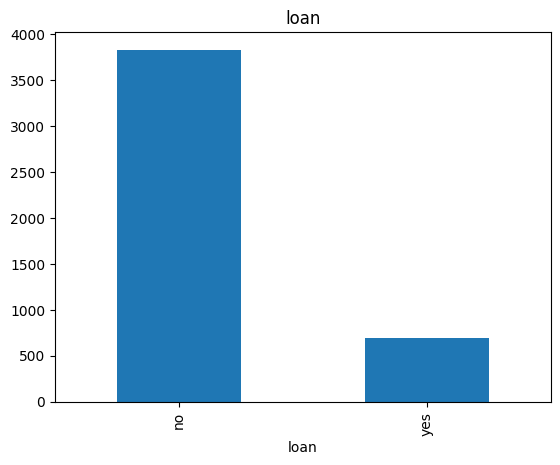

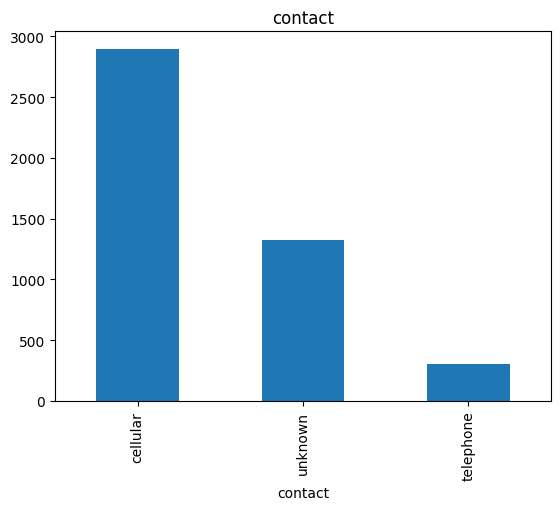

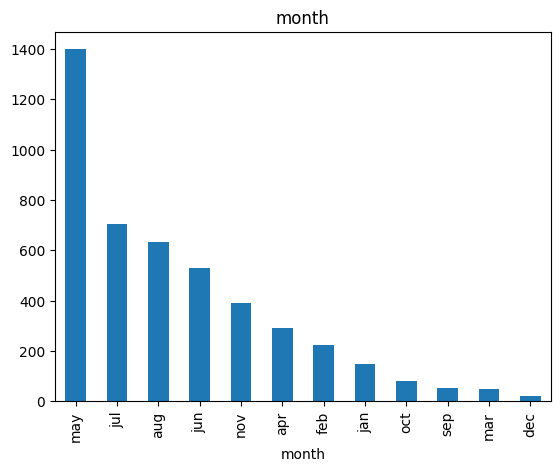

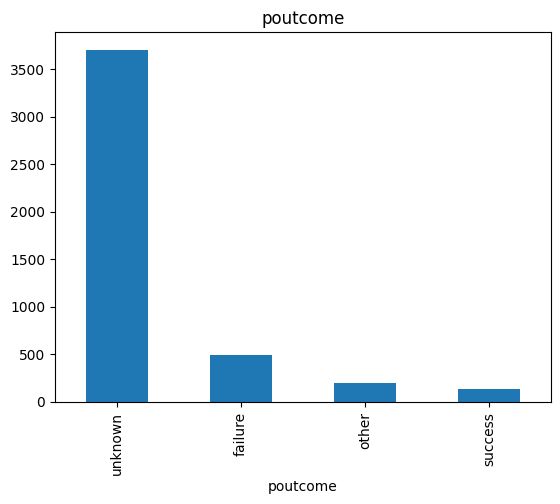

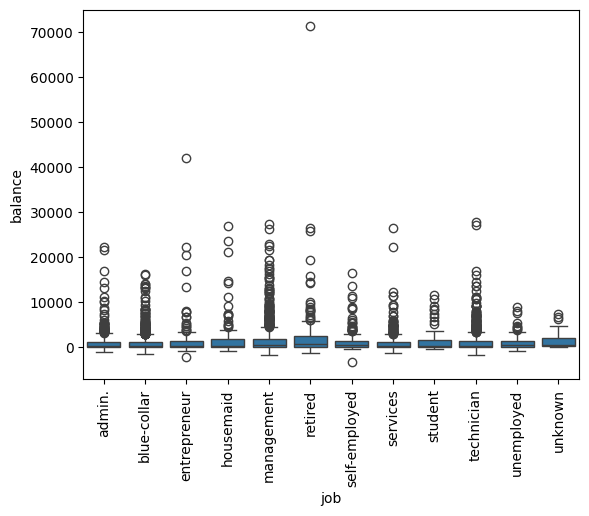

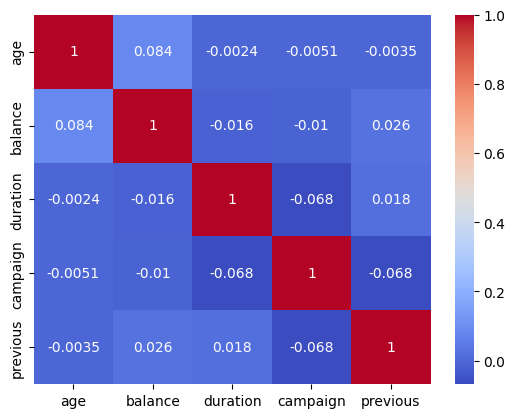

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df[['age', 'balance', 'duration', 'campaign']].hist(figsize=(10, 8))
plt.show()

# Bar charts for categorical features
for col in categorical_columns:
    if col != 'y':  # 'y' is binary outcome
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()

# Box plot for 'balance' by 'job'
sns.boxplot(x='job', y='balance', data=df)
plt.xticks(rotation=90)
plt.show()

# Correlation matrix
correlation_matrix = df[['age', 'balance', 'duration', 'campaign', 'previous']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [24]:
print(df.describe())


               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous      cluster  transaction_frequency  \
count  4521.000000  4521.000000  4521.000000            4521.000000   
mean     39.766645     0.542579     1.298607               0.006110   
std     100.121124     1.693562     0.710366               0.065209   
min      -1.000000     0.000000     0.00

In [25]:
for col in categorical_columns:
    print(df[col].value_counts())


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
default
no     4445
yes      76
Name: count, dtype: int64
housing
yes    2559
no     1962
Name: count, dtype: int64
loan
no     3830
yes     691
Name: count, dtype: int64
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtyp

Feature Scaling and Clustering
Standardize Features and Apply K-Means Clustering:

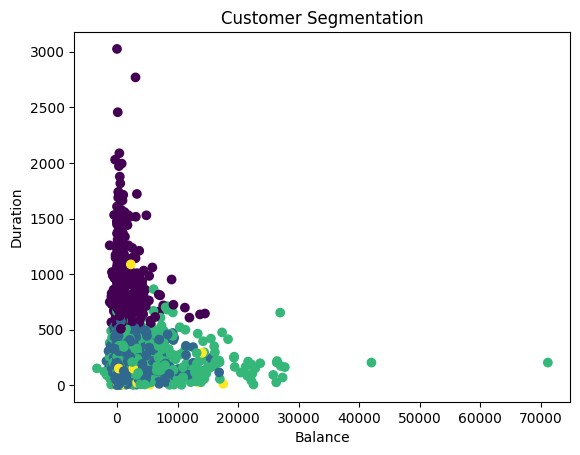

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize numerical features
features = ['age', 'balance', 'duration', 'campaign']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df['balance'], df['duration'], c=df['cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Customer Segmentation')
plt.show()


Predictive Modeling
Train and Evaluate Random Forest Classifier:

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data
X = df.drop('y', axis=1)
y = df['y'].cat.codes  # Convert categorical target to numerical
X = pd.get_dummies(X)  # Convert categorical features to dummy variables

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.63      0.31      0.42       167

    accuracy                           0.89      1357
   macro avg       0.77      0.64      0.68      1357
weighted avg       0.88      0.89      0.88      1357

